In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

## DATA FROM THE SUPERMARKET

In [3]:
df = pd.read_csv('supermaket.csv')

In [5]:
df.head()

,Unnamed: 0,Product,Category,Unit_Price,Quantity_Sold,Sales_Profit,Date_of_Sales
0,0,Tomato,Meat,13.03,5,1.67,2023-01-01
1,1,Apple,Meat,17.91,11,2.51,2023-01-02
2,2,Lettuce,Dairy,12.95,17,0.93,2023-01-03
3,3,Lettuce,Vegetables,3.97,9,4.44,2023-01-04
4,4,Beef Steak,Fruits,19.64,17,0.67,2023-01-05


In [7]:
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
df.shape

(365, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        365 non-null    object 
 1   Category       365 non-null    object 
 2   Unit_Price     365 non-null    float64
 3   Quantity_Sold  365 non-null    int64  
 4   Sales_Profit   365 non-null    float64
 5   Date_of_Sales  365 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 17.2+ KB


### Calculate total sales for each transaction

In [13]:
df['Total_Sales'] = df['Unit_Price'] * df['Quantity_Sold']

In [15]:
df.head()

,Product,Category,Unit_Price,Quantity_Sold,Sales_Profit,Date_of_Sales,Total_Sales
0,Tomato,Meat,13.03,5,1.67,2023-01-01,65.15
1,Apple,Meat,17.91,11,2.51,2023-01-02,197.01
2,Lettuce,Dairy,12.95,17,0.93,2023-01-03,220.15
3,Lettuce,Vegetables,3.97,9,4.44,2023-01-04,35.73
4,Beef Steak,Fruits,19.64,17,0.67,2023-01-05,333.88


## Data Preprocessing

In [17]:
# Convert 'Date_of_Sales' to datetime
df['Date_of_Sales'] = pd.to_datetime(df['Date_of_Sales'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product        365 non-null    object        
 1   Category       365 non-null    object        
 2   Unit_Price     365 non-null    float64       
 3   Quantity_Sold  365 non-null    int64         
 4   Sales_Profit   365 non-null    float64       
 5   Date_of_Sales  365 non-null    datetime64[ns]
 6   Total_Sales    365 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 20.1+ KB


In [21]:

# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can fill or drop them (e.g., df.dropna(inplace=True)

Product          0
Category         0
Unit_Price       0
Quantity_Sold    0
Sales_Profit     0
Date_of_Sales    0
Total_Sales      0
dtype: int64


## Time Series Analysis

#### For time series analysis, we will focus on examining trends in sales, identifying seasonality, and potentially forecasting future sales

### a) Sales Over Time

#### Let’s first visualize how total sales have changed over time. We can plot the total sales per day.

In [23]:
import matplotlib.pyplot as plt

In [25]:
# Group by date and sum the sales
daily_sales = df.groupby('Date_of_Sales')['Total_Sales'].sum()

In [29]:
daily_sales

Date_of_Sales
2023-01-01     65.15
2023-01-02    197.01
2023-01-03    220.15
2023-01-04     35.73
2023-01-05    333.88
               ...  
2023-12-27     46.53
2023-12-28     80.52
2023-12-29    177.58
2023-12-30    199.26
2023-12-31     83.76
Name: Total_Sales, Length: 365, dtype: float64

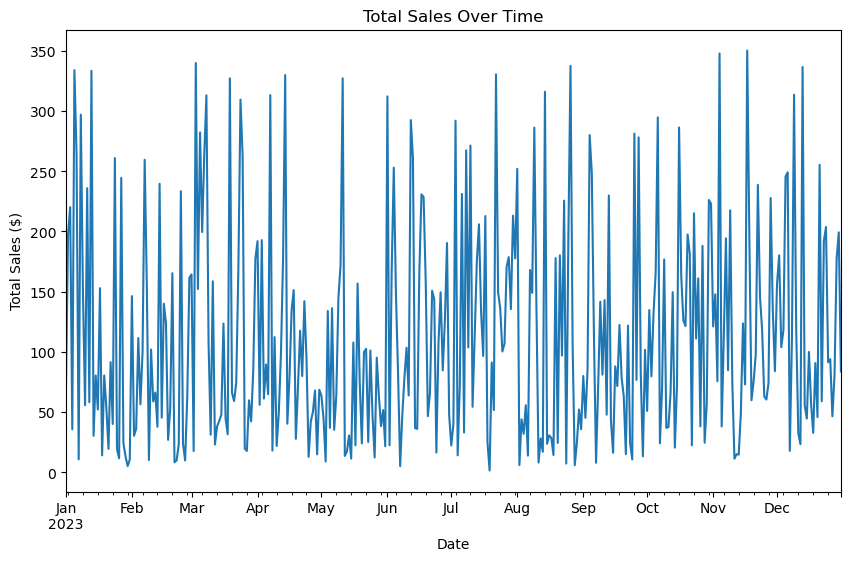

In [33]:
# Plotting total sales over time
plt.figure(figsize=(10,6))
daily_sales.plot(title="Total Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.show()

## b) Seasonality Analysis

#### To examine the seasonality of sales, we can group the data by month and year and then plot the average sales for each month.

In [35]:
# Add 'Month' and 'Year' columns
df['Month'] = df['Date_of_Sales'].dt.month
df['Year'] = df['Date_of_Sales'].dt.year
df['Day'] =  df['Date_of_Sales'].dt.day

In [37]:
df.head()

,Product,Category,Unit_Price,Quantity_Sold,Sales_Profit,Date_of_Sales,Total_Sales,Month,Year,Day
0,Tomato,Meat,13.03,5,1.67,2023-01-01,65.15,1,2023,1
1,Apple,Meat,17.91,11,2.51,2023-01-02,197.01,1,2023,2
2,Lettuce,Dairy,12.95,17,0.93,2023-01-03,220.15,1,2023,3
3,Lettuce,Vegetables,3.97,9,4.44,2023-01-04,35.73,1,2023,4
4,Beef Steak,Fruits,19.64,17,0.67,2023-01-05,333.88,1,2023,5


##### Group by month and year to calculate average sales

In [39]:
monthly_sales = df.groupby(['Year', 'Month'])['Total_Sales'].mean().unstack()

In [41]:
monthly_sales.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2023,111.681935,89.236071,130.709677,99.043333,73.774839,127.457667,135.710968,99.332903,102.169333,124.3,120.863667,126.32871


#### Month 7 (July) has the highest mean sales 

In [43]:
monthly_sales = df.groupby(['Year', 'Month'])['Total_Sales'].mean()

In [45]:
monthly_sales.head()

Year  Month
2023  1        111.681935
      2         89.236071
      3        130.709677
      4         99.043333
      5         73.774839
Name: Total_Sales, dtype: float64

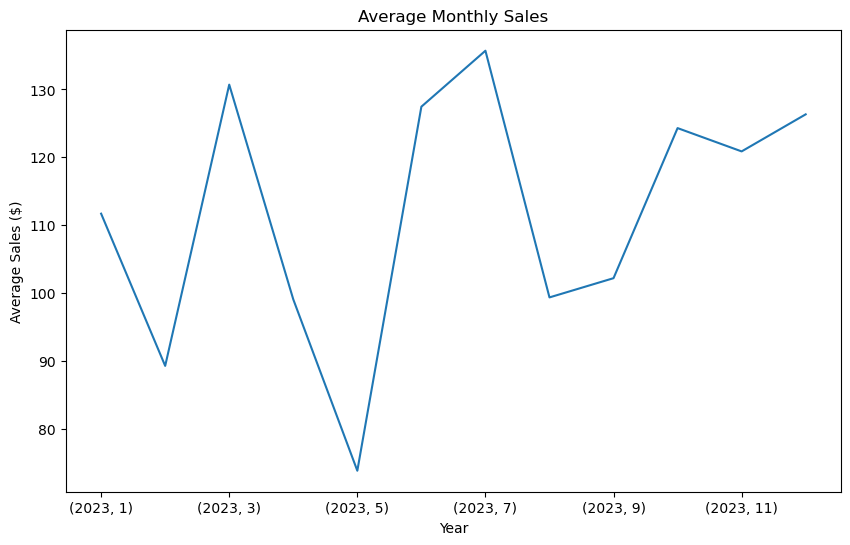

In [47]:
# Plotting monthly sales average
monthly_sales.plot(figsize=(10,6), title='Average Monthly Sales')
plt.xlabel('Year')
plt.ylabel('Average Sales ($)')
plt.show()

## c) Sales Forecasting (ARIMA Model)

You can use ARIMA for forecasting future sales based on historical data. Here is an example of how to apply ARIMA to forecast the next few days of sales.

In [49]:
from statsmodels.tsa.arima.model import ARIMA

### Use daily sales data for ARIMA

In [51]:
daily_sales_log = np.log(daily_sales)

## Fit ARIMA model (we can tweak the parameters for better results)

In [53]:
model = ARIMA(daily_sales_log, order=(5,1,0))  # AR(5), I(1), MA(0)
model_fit = model.fit()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [55]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(start=daily_sales.index[-1] + timedelta(days=1), periods=30)

In [57]:
# Convert the forecast back to original scale (by exponentiating)
forecast_values = np.exp(forecast)

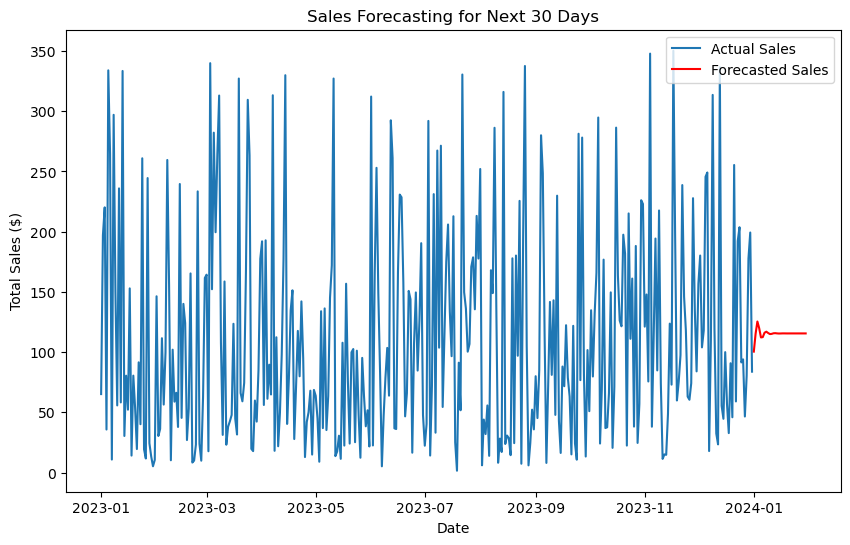

In [59]:
# Plotting the forecast
plt.figure(figsize=(10,6))
plt.plot(daily_sales.index, daily_sales, label='Actual Sales')
plt.plot(forecast_dates, forecast_values, label='Forecasted Sales', color='red')
plt.title('Sales Forecasting for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.show()

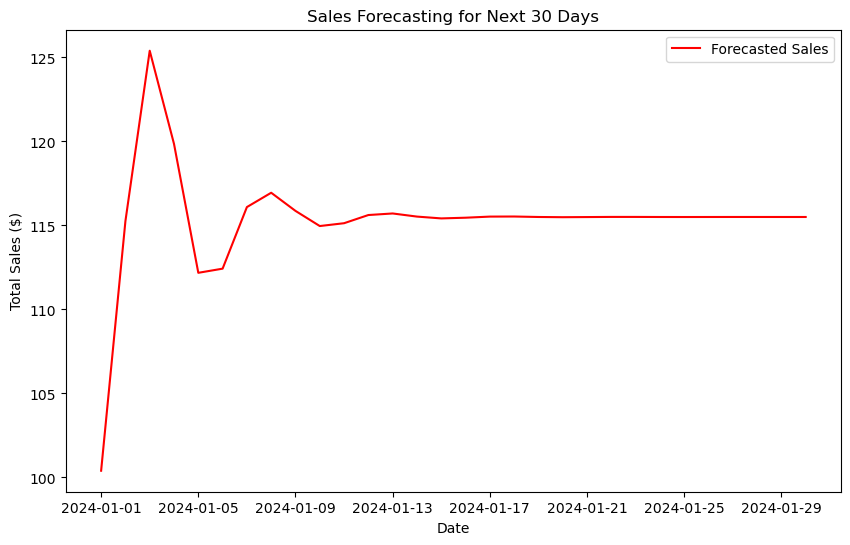

In [61]:
# Plotting the forecast
plt.figure(figsize=(10,6))
plt.plot(forecast_dates, forecast_values, label='Forecasted Sales', color='red')
plt.title('Sales Forecasting for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.show()

### USING XGBoot Machine Learning

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import xgboost as xgb
col_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [65]:
daily_sales.head()

Date_of_Sales
2023-01-01     65.15
2023-01-02    197.01
2023-01-03    220.15
2023-01-04     35.73
2023-01-05    333.88
Name: Total_Sales, dtype: float64

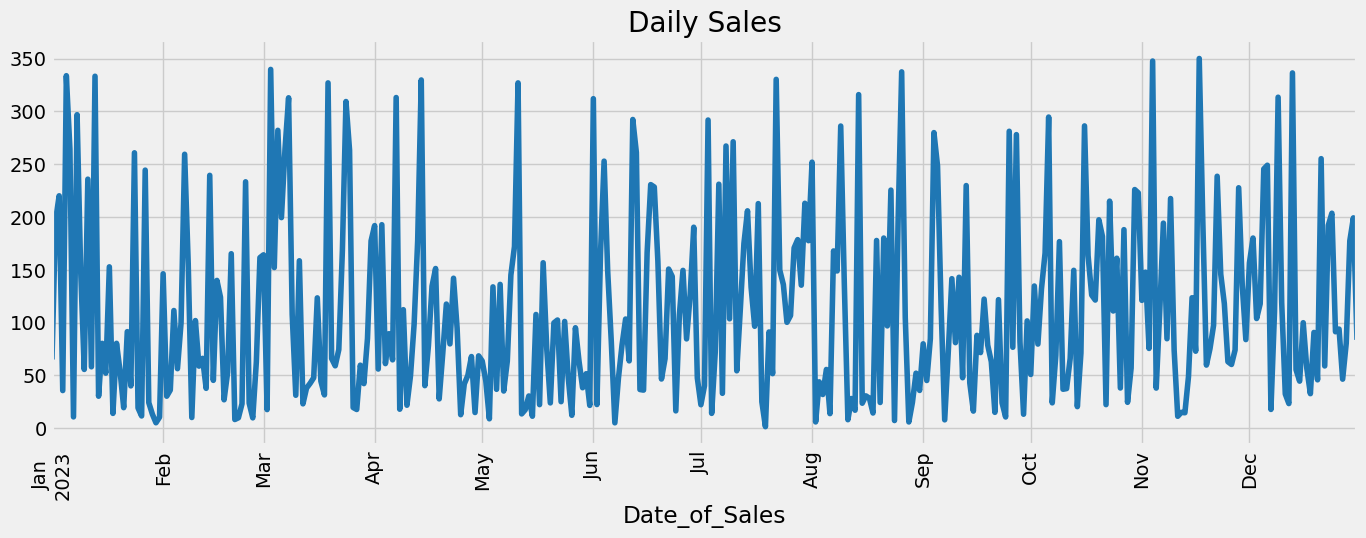

In [67]:
daily_sales.plot(style='-', figsize=(15,5),color=col_pal[0], title='Daily Sales')
plt.xticks(rotation=90)
plt.show();

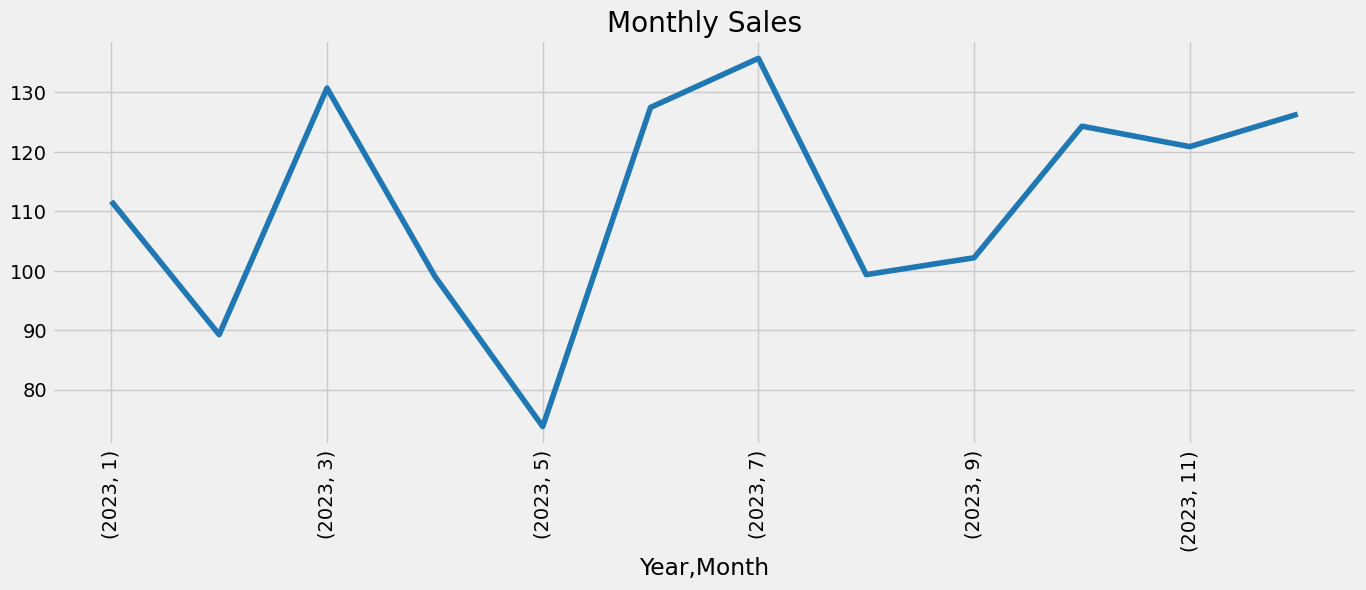

In [69]:
monthly_sales.plot(style='-', figsize=(15,5),color=col_pal[0], title='Monthly Sales')
plt.xticks(rotation=90)
plt.show();

## 4. Advanced Analysis (Product and Category Performance)

We can also analyze how different products and categories are performing in terms of sales and profit.

## a) Total Sales by Product

In [71]:
# Total sales by product
sales_by_product = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)

In [73]:
sales_by_product

Product
Lettuce           5363.54
Milk              4710.69
Cheese            4596.14
Apple             4540.14
Tomato            4223.94
Beef Steak        3980.36
Potato            3760.67
Carrot            3343.22
Banana            3240.87
Chicken Breast    3082.07
Name: Total_Sales, dtype: float64

In [75]:
df.head()

,Product,Category,Unit_Price,Quantity_Sold,Sales_Profit,Date_of_Sales,Total_Sales,Month,Year,Day
0,Tomato,Meat,13.03,5,1.67,2023-01-01,65.15,1,2023,1
1,Apple,Meat,17.91,11,2.51,2023-01-02,197.01,1,2023,2
2,Lettuce,Dairy,12.95,17,0.93,2023-01-03,220.15,1,2023,3
3,Lettuce,Vegetables,3.97,9,4.44,2023-01-04,35.73,1,2023,4
4,Beef Steak,Fruits,19.64,17,0.67,2023-01-05,333.88,1,2023,5


In [77]:
# Total sales by product
sales_profit_by_product = df.groupby('Product')['Sales_Profit'].sum().sort_values(ascending=False)

In [79]:
sales_profit_by_product

Product
Lettuce           147.57
Milk              117.16
Cheese            111.70
Carrot            111.32
Potato             97.19
Tomato             91.29
Beef Steak         89.94
Apple              89.16
Banana             72.96
Chicken Breast     67.80
Name: Sales_Profit, dtype: float64

In [81]:
import seaborn as sns

In [83]:
df.columns

Index(['Product', 'Category', 'Unit_Price', 'Quantity_Sold', 'Sales_Profit',
       'Date_of_Sales', 'Total_Sales', 'Month', 'Year', 'Day'],
      dtype='object')

<Axes: xlabel='Quantity_Sold', ylabel='Total_Sales'>

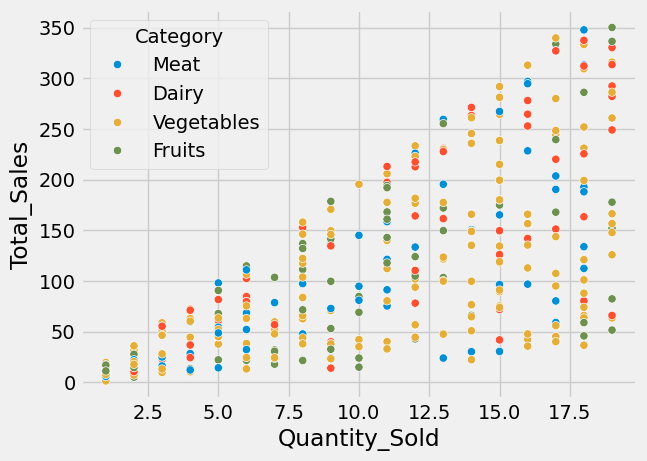

In [85]:
sns.scatterplot(df,x='Quantity_Sold',y='Total_Sales',hue='Category')

<Axes: xlabel='Unit_Price', ylabel='Total_Sales'>

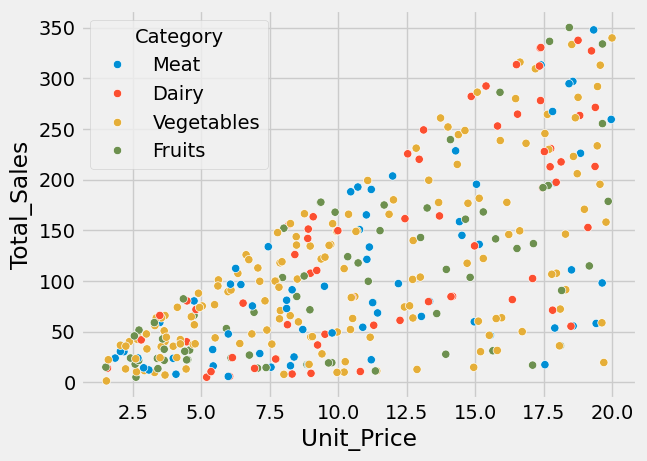

In [87]:
sns.scatterplot(df,x='Unit_Price',y='Total_Sales',hue='Category')

In [ ]:
sns.scatterplot(df,x='Unit_Price',y='Total_Sales',hue='Product')

In [ ]:
df.columns

<Axes: xlabel='Unit_Price', ylabel='Quantity_Sold'>

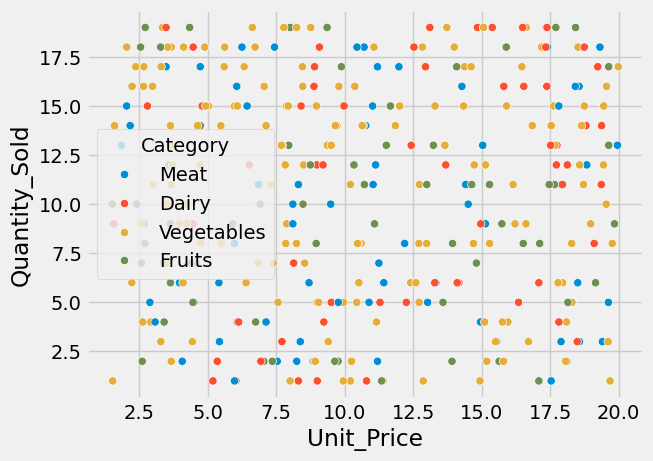

In [89]:
sns.scatterplot(df,x='Unit_Price',y='Quantity_Sold',hue='Category')

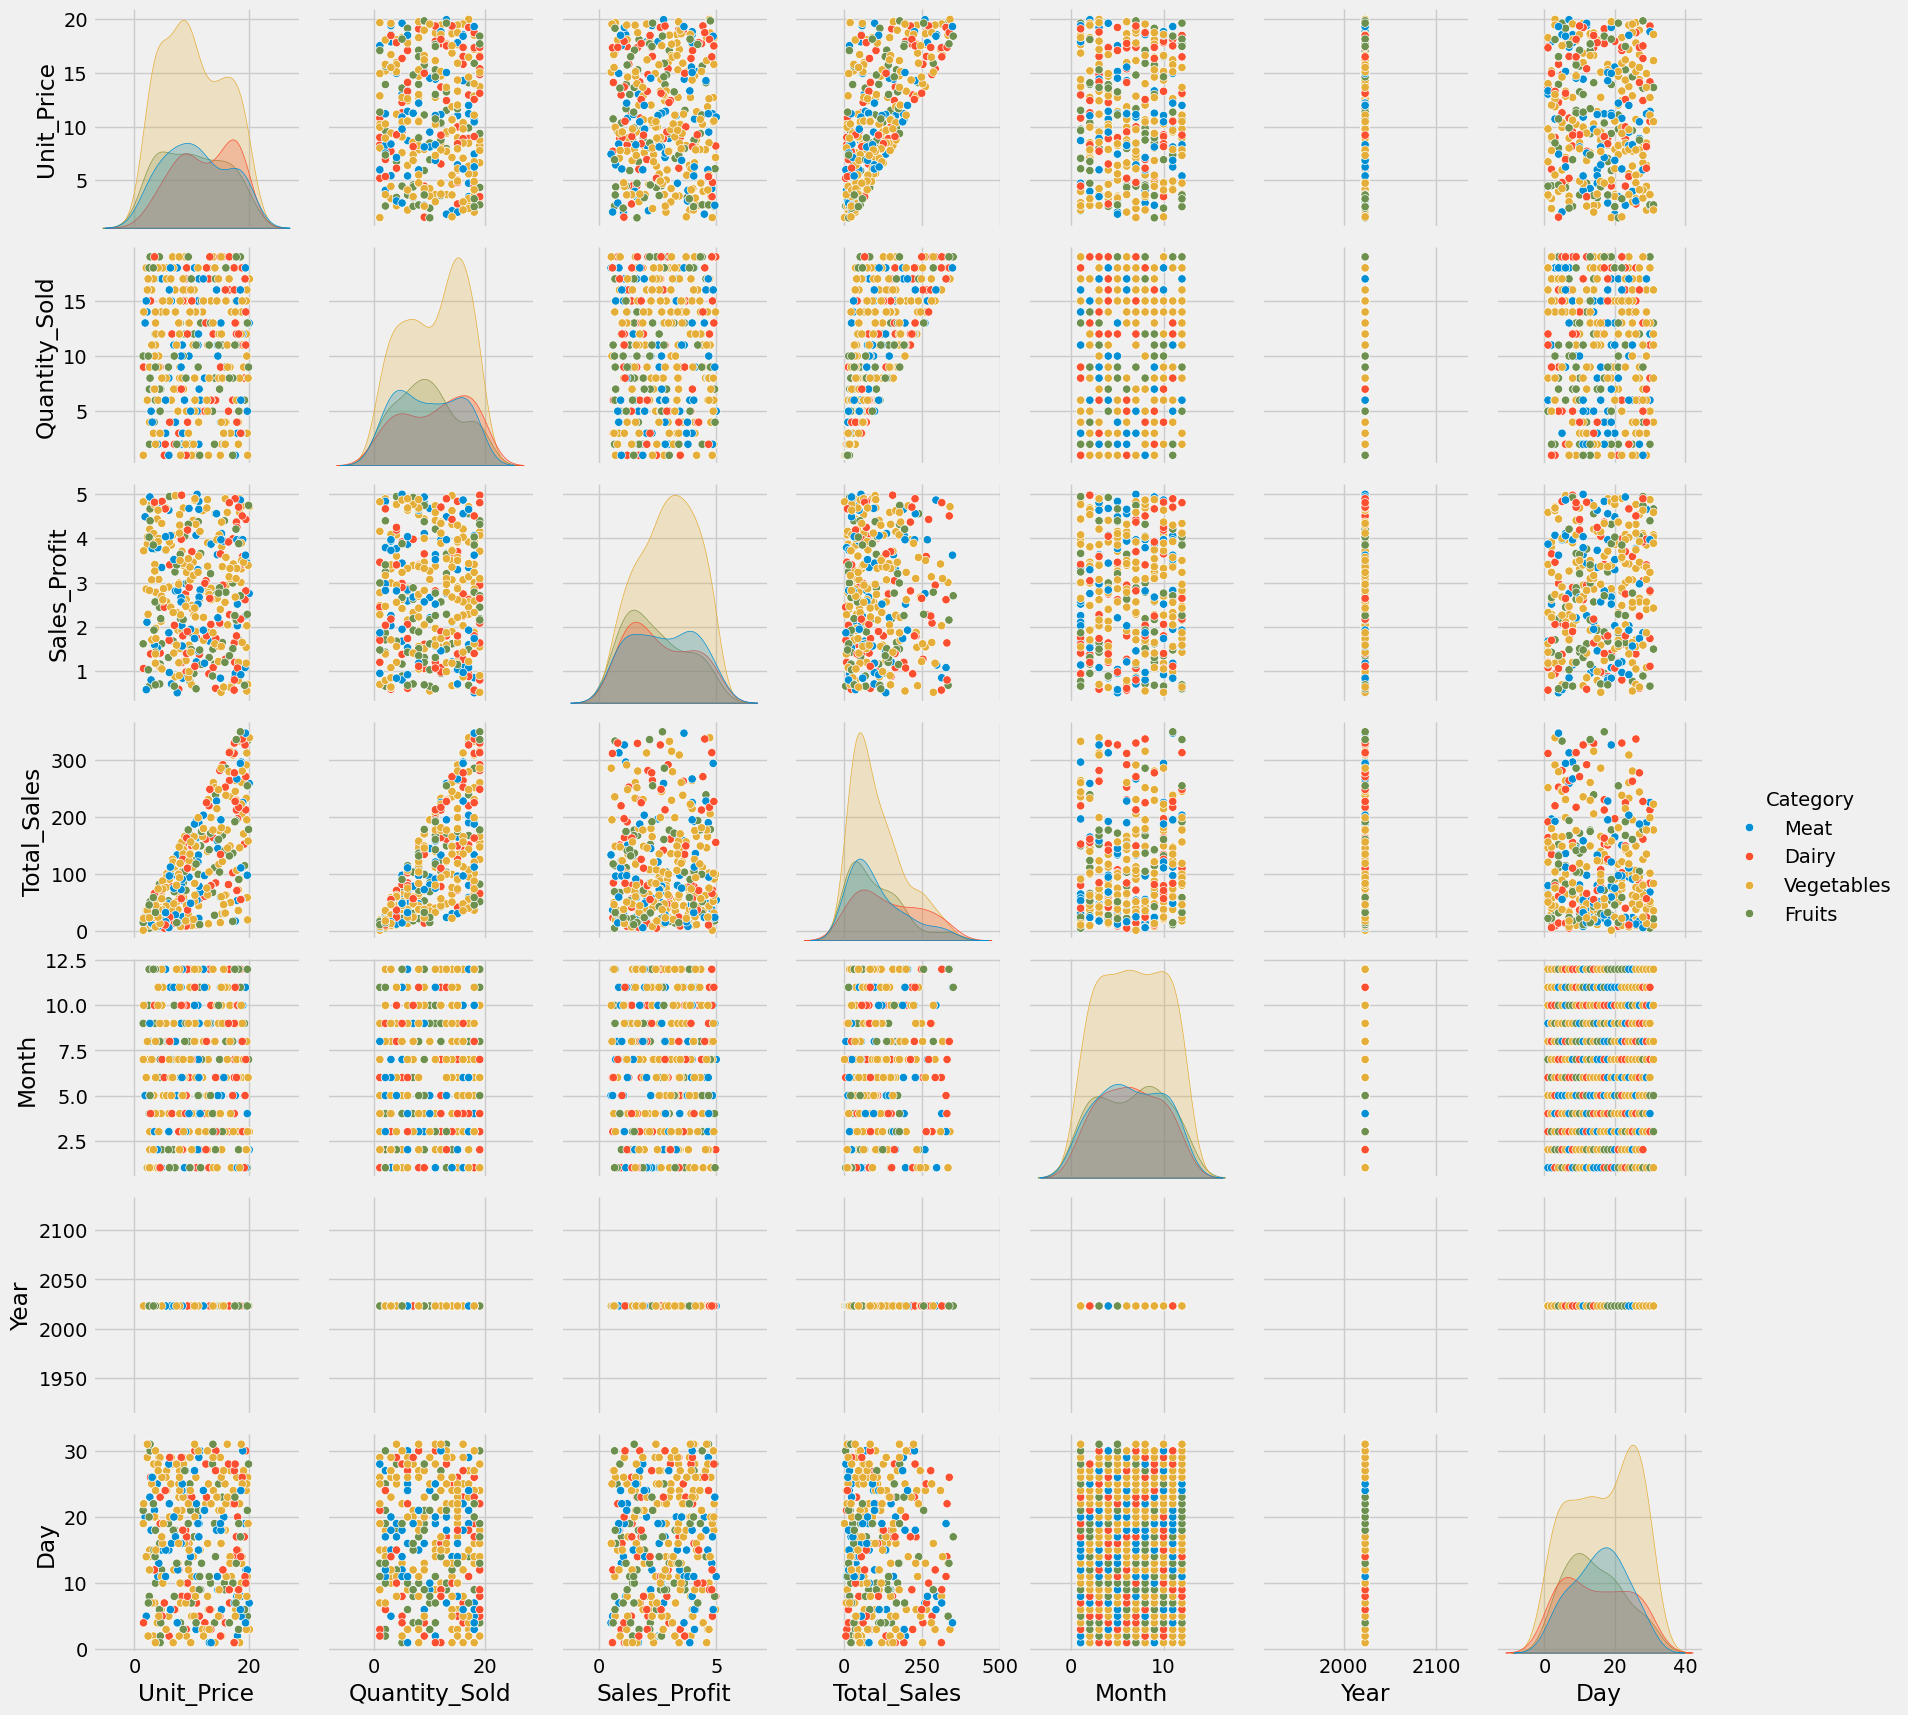

In [91]:
sns.pairplot(df,hue='Category')

In [93]:
# Total sales by product
sales_by_product = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)

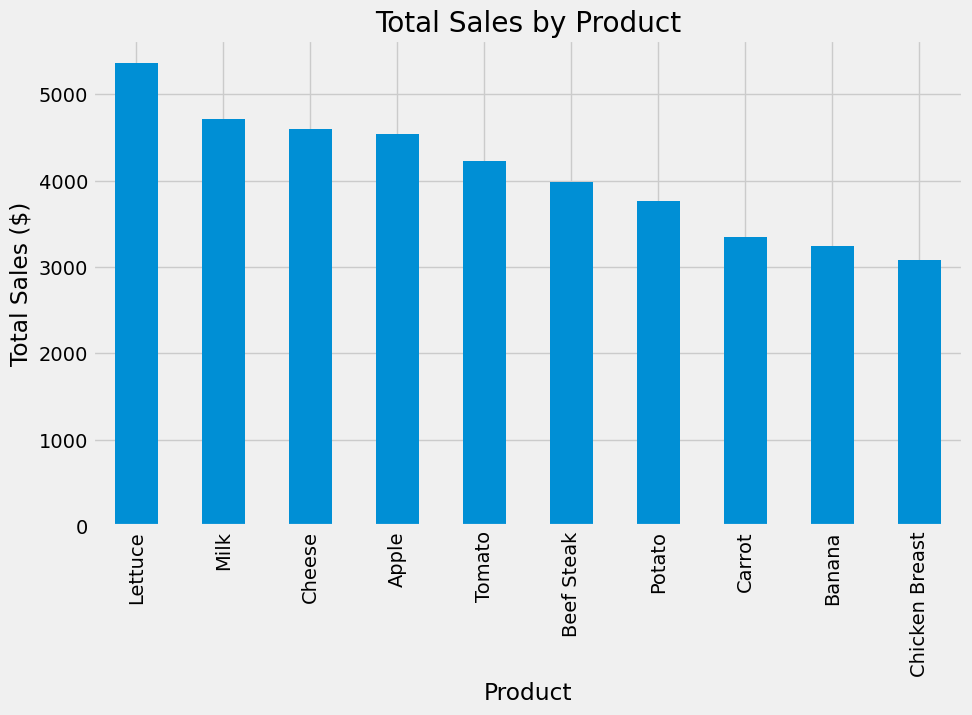

In [95]:
# Plotting sales by product
plt.figure(figsize=(10,6))
sales_by_product.plot(kind='bar', title='Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.show()

## Profit by Category

In [97]:
# Total profit by category
profit_by_category = df.groupby('Category')['Sales_Profit'].sum().sort_values(ascending=False)

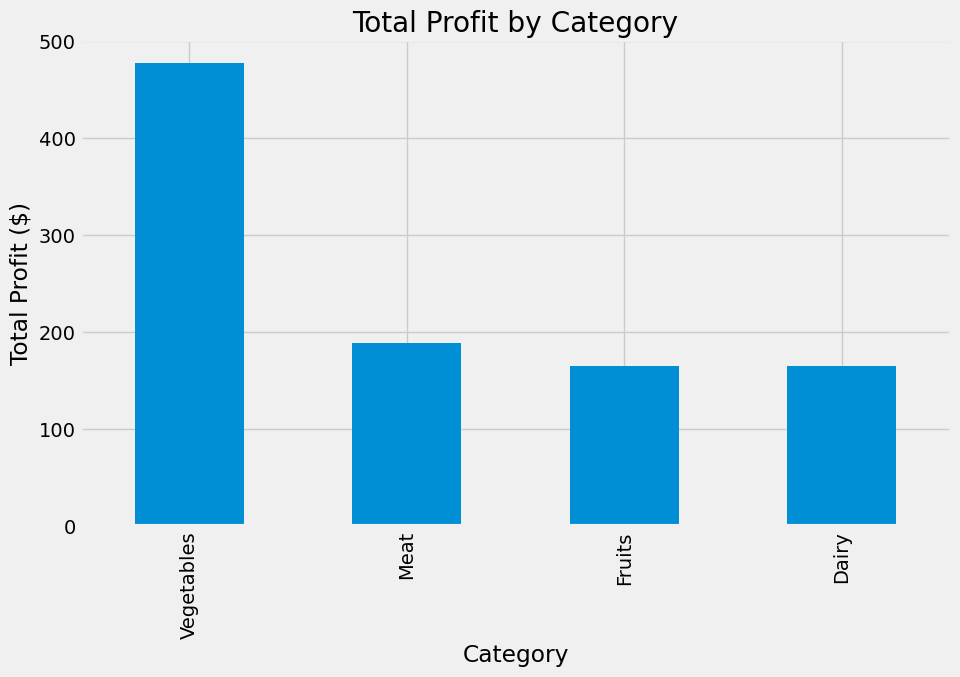

In [99]:
# Plotting profit by category
plt.figure(figsize=(10,6))
profit_by_category.plot(kind='bar', title='Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.show()